In [7]:
import format_data
import matplotlib.pyplot as plt
import librosa
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


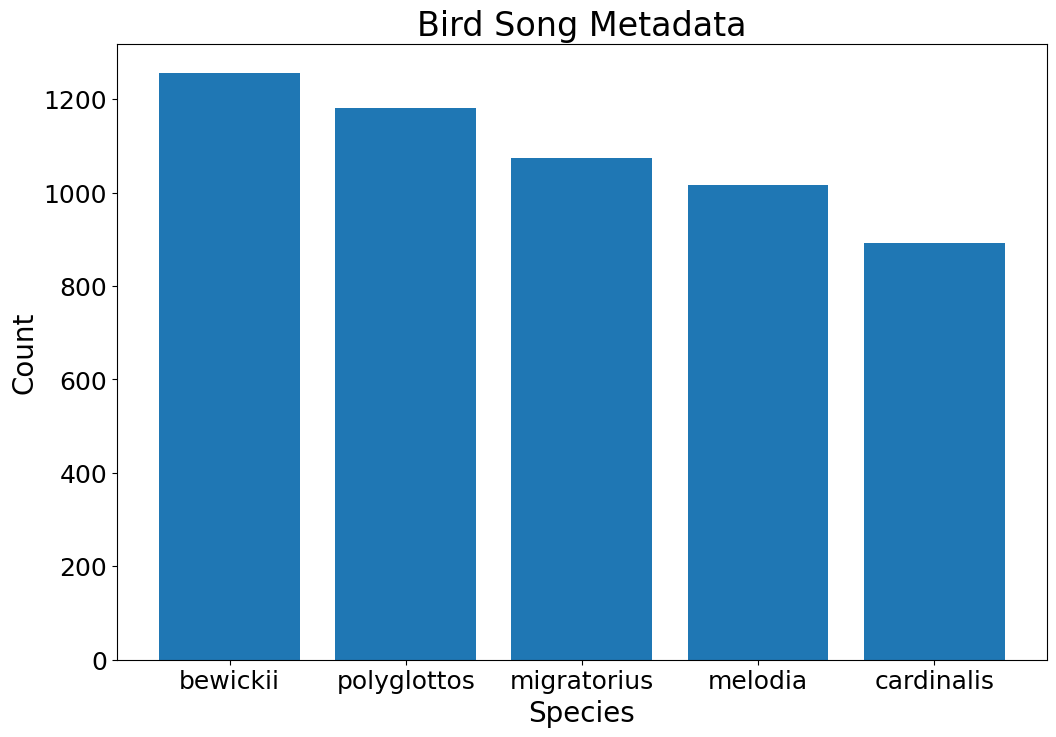

In [8]:
df = pd.read_csv("data/bird_songs_metadata.csv")
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(df["species"].unique(),df["species"].value_counts())
ax.set_xlabel('Species', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_title('Bird Song Metadata', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.savefig('bird_songs_metadata.svg', bbox_inches='tight')

In [9]:
labels = format_data.create_labels()
print(labels)
print(len(labels))

files = format_data.create_files()
print(files)
print(len(files))

[0 0 0 ... 4 4 4]
5422
['data/wavfiles/557838-0.wav' 'data/wavfiles/557838-1.wav'
 'data/wavfiles/557838-4.wav' ... 'data/wavfiles/11713-14.wav'
 'data/wavfiles/11713-15.wav' 'data/wavfiles/11713-16.wav']
5422


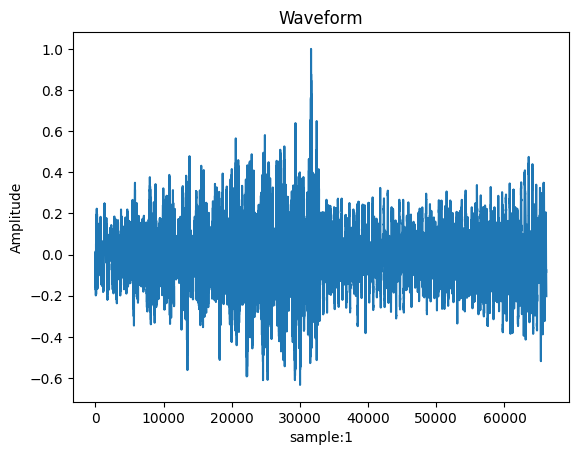

In [10]:
y, _ = librosa.load(files[0])

plt.plot(y)
plt.title("Waveform")
plt.xlabel('sample:1')
plt.ylabel("Amplitude")
plt.show()

22050 22050
(66150,)


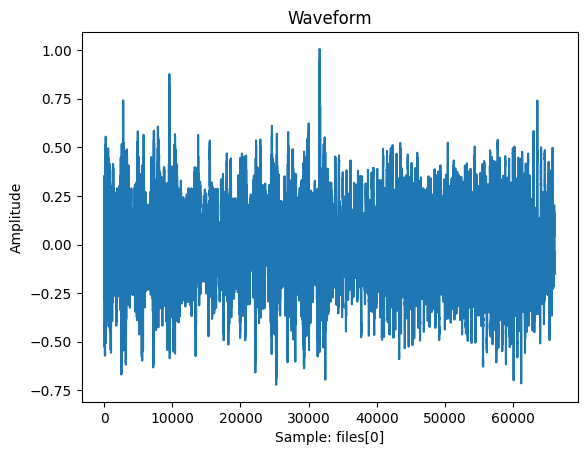

In [11]:
y, sy = librosa.load(files[0])
x,sx = librosa.load(files[1])
print(sx,sy)
print(x.shape)
plt.plot(y+x)
plt.title("Waveform")
plt.xlabel("Sample: files[0]")
plt.ylabel("Amplitude")
plt.show()

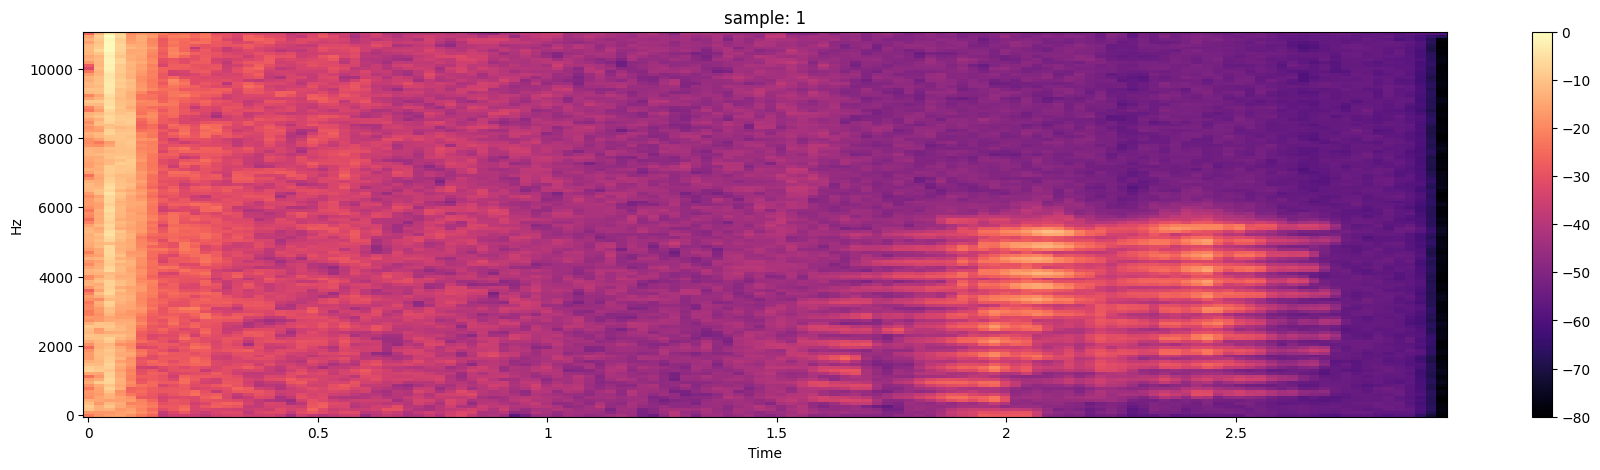

In [12]:
spec = format_data.create_spec(files[0])
plt.figure(figsize=(22,5))
librosa.display.specshow(spec.T,y_axis='linear', x_axis='time', cmap = 'magma')
plt.colorbar()
plt.title('sample: 1')
plt.show()

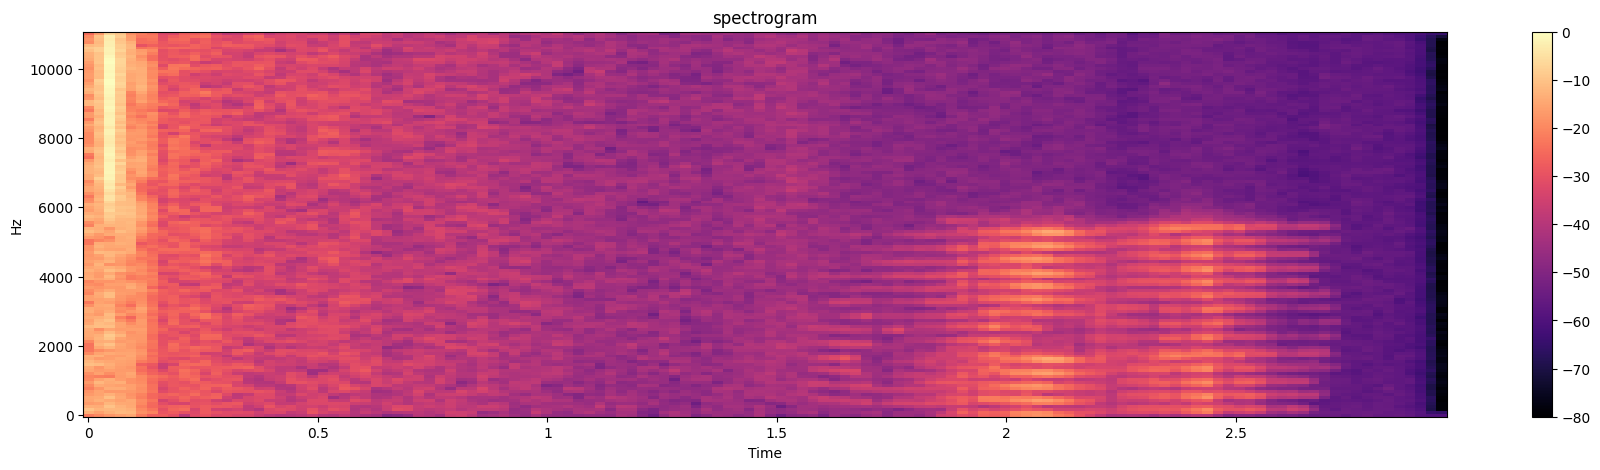

In [13]:
spec = format_data.create_spec_audio(x+y,sx )
plt.figure(figsize=(22,5))
librosa.display.specshow(spec.T,y_axis='linear', x_axis='time', cmap = 'magma')
plt.colorbar()
plt.title('spectrogram')
plt.show()

In [14]:
x_train, y_train, x_test, y_test, x_val, y_val =format_data.create_dataset()
print(x_train.shape, "shoould be 5000")
print(y_train.shape, "should be 5000")
print(x_test.shape, "shoould be 300")
print(y_test.shape, "should be 300")
print(x_val.shape, "shoould be 122")
print(y_val.shape, "should be 122")


5422
5422
(5000, 128, 130) shoould be 5000
(5000,) should be 5000
(300, 128, 130) shoould be 300
(300,) should be 300
(122, 128, 130) shoould be 122
(122,) should be 122


In [15]:
print(x_train.shape)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
print(x_train.shape)

(5000, 128, 130)
(5000, 128, 130, 1)


In [16]:
#now we construct our model: 
from tensorflow import keras 
from convolutional import conv_encode_classify

conv_classifier = conv_encode_classify(x_train.shape[1:])
conv_classifier.compile(optimizer = keras.optimizers.Adam(learning_rate =0.0001), loss ='categorical_crossentropy',metrics =['accuracy'])
conv_classifier.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 130, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 130, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 65, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 65, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496 

In [17]:
#train model: 
import tensorflow as tf
x_dev = x_train[:100]
y_dev = y_train[:100]
y_dev = tf.one_hot(y_dev, 5)
print(x_dev.shape, y_dev.shape)

conv_classifier.fit(x_dev, y_dev, epochs = 10)

(100, 128, 130, 1) (100, 5)
Epoch 1/10
4/4 [==============================] - 2s 135ms/step - loss: 3.9496 - accuracy: 0.2300
Epoch 2/10
4/4 [==============================] - 1s 118ms/step - loss: 3.6324 - accuracy: 0.1900
Epoch 3/10
4/4 [==============================] - 1s 120ms/step - loss: 2.6651 - accuracy: 0.2800
Epoch 4/10
4/4 [==============================] - 1s 134ms/step - loss: 3.0226 - accuracy: 0.3500
Epoch 5/10
4/4 [==============================] - 1s 135ms/step - loss: 2.5618 - accuracy: 0.2500
Epoch 6/10
2/4 [==============>...............] - ETA: 0s - loss: 1.7064 - accuracy: 0.3281

KeyboardInterrupt: 

In [37]:
#redefine:
tf.random.set_seed(0)
conv_classifier = conv_encode_classify(x_train.shape[1:])
conv_classifier.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
conv_classifier.summary()
#run again with all data
y_train_one_hot = tf.one_hot(y_train, 5)
hist = conv_classifier.fit(x_train, y_train_one_hot,epochs = 12,batch_size = 64,validation_data =(x_val,tf.one_hot(y_val, 5)))

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 128, 130, 1)]     0         
                                                                 
 conv2d_42 (Conv2D)          (None, 128, 130, 16)      160       
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 64, 65, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 64, 65, 32)        4640      
                                                                 
 max_pooling2d_43 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 32, 32, 64)        184

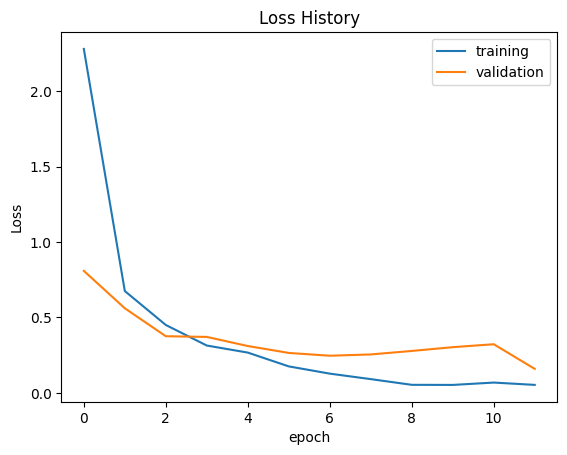

In [38]:
# lets look at some of our results:

plt.title('Loss History')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label = 'training')
plt.plot(hist.history['val_loss'], label = 'validation')
plt.legend()


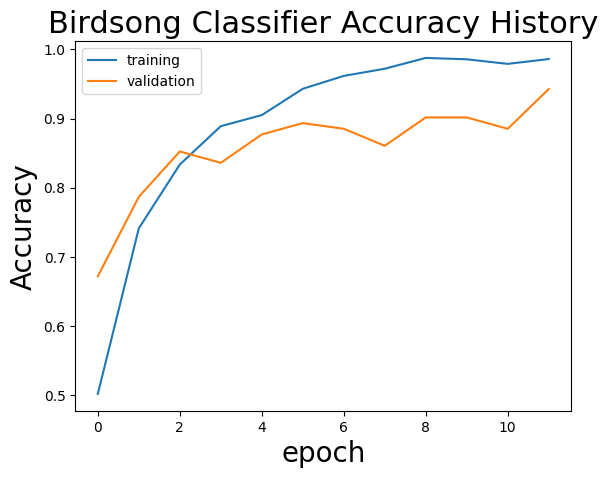

In [42]:
plt.title('Birdsong Classifier Accuracy History', fontsize = 22)
plt.xlabel('epoch',fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.plot(hist.history['accuracy'], label = 'training')
plt.plot(hist.history['val_accuracy'],label = 'validation')
plt.legend()
plt.savefig('acc_hist.svg')

In [43]:
#test accuracy
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1],x_test.shape[2], 1))
print(x_test.shape, y_test.shape)
acc = conv_classifier.evaluate(x_test, tf.one_hot(y_test, 5))
print(acc)


(300, 128, 130, 1) (300,)
10/10 [==============================] - 1s 42ms/step - loss: 0.5019 - accuracy: 0.8733
[0.5018690824508667, 0.8733333349227905]


In [44]:
from sklearn.metrics import confusion_matrix
import numpy as np

# predict over test set
y_pred = conv_classifier.predict(x_test )

# make one hot for labels
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(tf.one_hot(y_test, 5), axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

print(confusion_mtx)

10/10 [==============================] - 1s 41ms/step
[[45  1  1  4  1]
 [ 4 57  1  1  2]
 [ 1  1 36  2  0]
 [ 4  2  1 59  1]
 [ 2  4  1  4 65]]


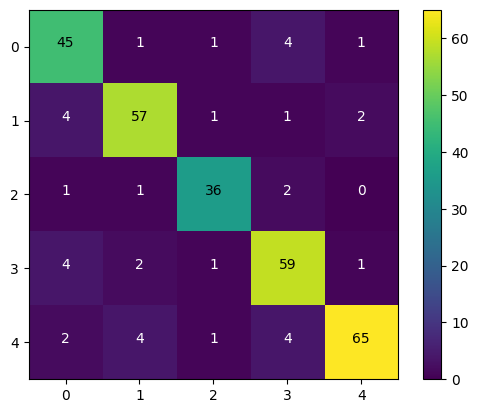

In [52]:
import matplotlib.pyplot as plt

#display confusion
plt.figure()
plt.imshow(confusion_mtx, cmap='viridis')

# labels
maximum_el = confusion_mtx.max()

for i in range(confusion_mtx.shape[0]):
    for j in range(confusion_mtx.shape[1]):
        plt.text(j, i, confusion_mtx[i, j],
                 horizontalalignment='center',
                 color='black' if confusion_mtx[i, j] >maximum_el/ 2 else 'white')

plt.colorbar()
plt.savefig('confusion_mtx.svg')
plt.show()


In [54]:

conv_classifier.save('conv_classifier_87test.keras')

## Since Single Class Classification Works Fairly Well, Let us Explore Another Problem:

#### What if we wanted to learn to isolate audio signals?

This is a complex task and there are many ways to do this.  We will use a fairly simple version.



In [27]:
#testing to see split works as expected
a0,a1,a2,a3,a4 = format_data.split_data_specie()
print(a0.shape,a1.shape,a2.shape,a3.shape,a4.shape)



(893, 2) (1182, 2) (1017, 2) (1256, 2) (1074, 2)


In [59]:
# testing to see create superposition works as expected
a0_1, a2_3, a3_4 = format_data.create_superposition()
print(a0_1.shape, a2_3.shape, a3_4.shape)
# print(a0_1[:5,:])

(893, 2) (1017, 2) (1074, 2)


In [60]:
print(a2_3[:, 0])

[2 2 2 ... 2 2 2]


In [61]:

#we have data as spectrogram superpositions,
#we can optimze this dataset more still but let's test our model now

#we gather our labels also (a0 without superposition)
a0_y = np.stack(a0[:,1])
print(a0_y.shape)
print(a0_1.shape)
#let's just run a little bit of data into our model to see if it learns anything 
a0_1 = np.stack(a0_1[:,1])


(893, 128, 130)
(893, 2)


In [62]:
a0_y_reshape = np.reshape(a0_y, (a0_1.shape[0],a0_1.shape[1],a0_1.shape[2],1))

In [63]:
print(a0_1.shape)
a0_1_shaped = np.reshape(a0_1, (a0_1.shape[0],a0_1.shape[1],a0_1.shape[2],1))
print(a0_1_shaped.shape)
a0_1_shaped_clipped = a0_1_shaped[:, :128, :128, :]
a0_y_reshape_clipped = a0_y_reshape[:, :128, :128, :]

(893, 128, 130)
(893, 128, 130, 1)


In [64]:
a0_min = a0_1_shaped_clipped.min()
a0_max = a0_1_shaped_clipped.max()

a0_1_normalized = (a0_1_shaped_clipped - a0_min) / (a0_max - a0_min)
a0_y_normalized = (a0_y_reshape_clipped - a0_min) / (a0_max - a0_min)

print(a0_1_normalized.max())
print(a0_y_normalized.max())

1.0
1.0


In [65]:
#make model and run first 20 samples.  Will overfit since data is homogenous but should see learning 

from convolutional import conv_encode_decode

denoiser = conv_encode_decode(a0_1_shaped_clipped.shape[1:])


In [66]:
import tensorflow as tf

def ssim_loss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

denoiser.compile(optimizer='adam', loss=ssim_loss)



In [67]:
denoiser.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 64)        1849

In [68]:
from tensorflow import keras
keras.utils.plot_model(denoiser)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [77]:
# np.save('data/xtrain.npy',a0_1_normalized[:-50])
# np.save('data/ytrain.npy', a0_1_normalized[:-50])
# np.save('data/xval.npy', a0_1_normalized[-20:])
# np.save('data/yval.npy', a0_y_normalized[-20:])

In [74]:
print(a0_1_shaped_clipped.shape, a0_y_reshape_clipped.shape)

denoiser.fit(a0_1_normalized[:-50],a0_y_normalized[:-50], epochs = 200, validation_data=(a0_1_normalized[-20:],a0_y_normalized[-20:]))

(893, 128, 128, 1) (893, 128, 128, 1)
Epoch 1/200
27/27 [==============================] - 36s 1s/step - loss: 0.3402 - val_loss: 0.3500
Epoch 2/200
27/27 [==============================] - 36s 1s/step - loss: 0.3331 - val_loss: 0.3426
Epoch 3/200
27/27 [==============================] - 36s 1s/step - loss: 0.3293 - val_loss: 0.3351
Epoch 4/200
27/27 [==============================] - 35s 1s/step - loss: 0.3228 - val_loss: 0.3368
Epoch 5/200
27/27 [==============================] - 35s 1s/step - loss: 0.3183 - val_loss: 0.3240
Epoch 6/200
27/27 [==============================] - 35s 1s/step - loss: 0.3148 - val_loss: 0.3155
Epoch 7/200
27/27 [==============================] - 34s 1s/step - loss: 0.3099 - val_loss: 0.3092
Epoch 8/200
27/27 [==============================] - 35s 1s/step - loss: 0.3071 - val_loss: 0.3036
Epoch 9/200
27/27 [==============================] - 35s 1s/step - loss: 0.3039 - val_loss: 0.3020
Epoch 10/200
27/27 [==============================] - 37s 1s/step - los

KeyboardInterrupt: 

1/1 [==============================] - 0s 96ms/step
(20, 128, 128, 1)


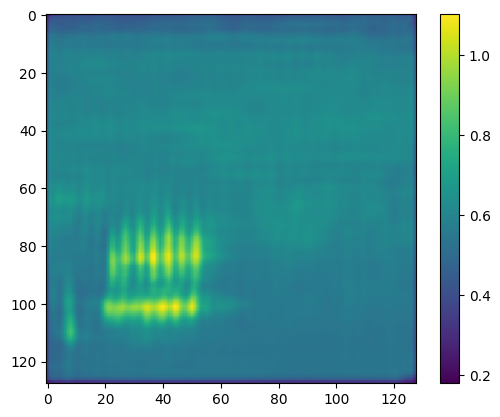

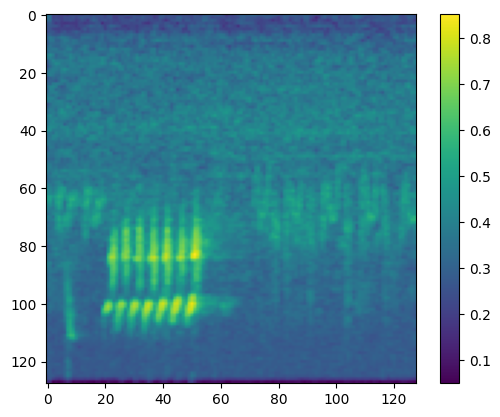

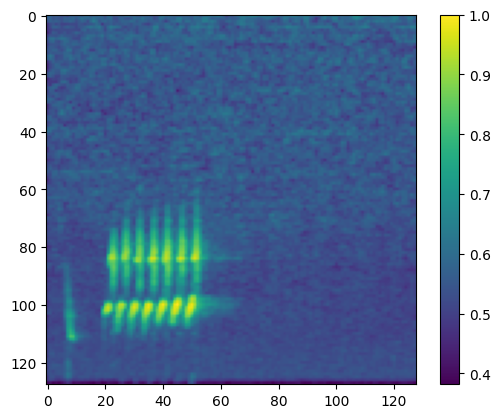

In [75]:
preds = denoiser.predict(a0_1_normalized[40:60])
print(preds.shape)
plt.figure()
plt.imshow(preds[0])
plt.colorbar()
plt.figure()
plt.imshow(a0_1_normalized[40])
plt.colorbar()
plt.figure()
plt.imshow(a0_y_normalized[40])
plt.colorbar()

(20, 128, 128, 1)


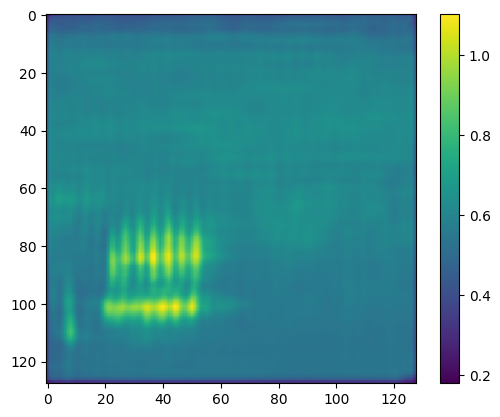

In [76]:
print(preds.shape)
plt.imshow(preds[0])
plt.colorbar()

In [3]:
data, data_true , labels = format_data.alternate_create_superposition()

(893, 66150)


In [4]:
#get data into own array 
import numpy as np
data_guy = np.stack(data)
labels = np.stack(labels)
data_true = np.stack(data_true)
data_guy = data_guy[:,:,:128,:128]
data_true = data_true[:,:,:128,:128]

data_guy = (data_guy-data_guy.min())/(data_guy.max()-data_guy.min())
data_true = (data_true-data_true.min())/(data_true.max()-data_true.min())

In [22]:
print(data_guy.shape)

(20, 893, 128, 128)


In [5]:
data_guy =data_guy.reshape((data_guy.shape[0]*data_guy.shape[1], data_guy.shape[2],data_guy.shape[3], 1))
data_true =data_true.reshape((data_true.shape[0]*data_true.shape[1], data_true.shape[2],data_true.shape[3], 1))
print(data_guy.shape, data_true.shape)

(17860, 128, 128, 1) (17860, 128, 128, 1)


In [6]:
np.save('data/all_supers_wave310.npy', data_guy)
np.save('data/all_super_labels_wave310.npy', labels)
np.save('data/all_supers_true_wave310.npy', data_true)